# Cohort analysis for a telecom company

### Cohort analysis is a subset of behavioral analytics that takes the data from a given eCommerce platform, web application, or online game and rather than looking at all users as one unit, it breaks them into related groups for analysis. These related groups, or cohorts, usually share common characteristics or experiences within a defined time-span.

### Aim : to predict whether a customer will churn .

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C://Users//ARYA SHARMA//Downloads//Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

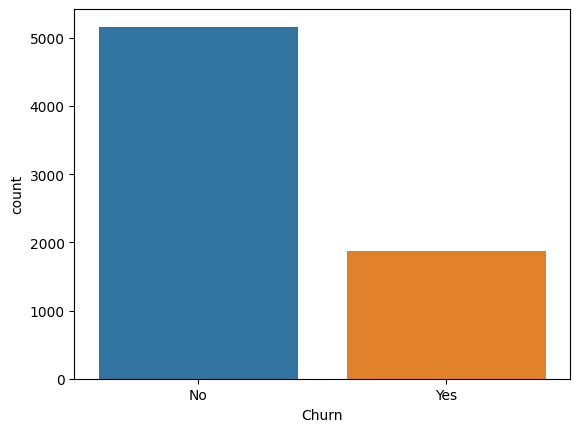

In [8]:
sns.countplot(data=df,x='Churn')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

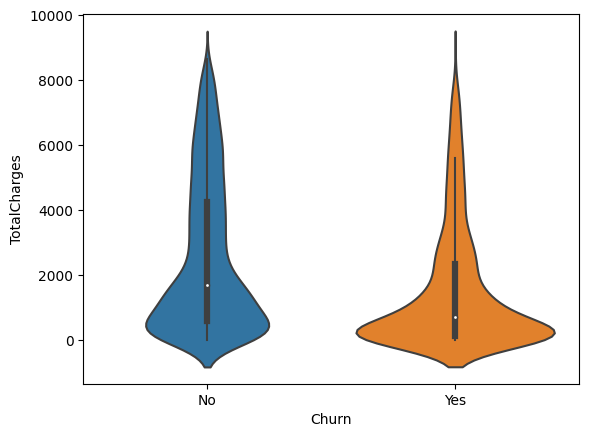

In [9]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

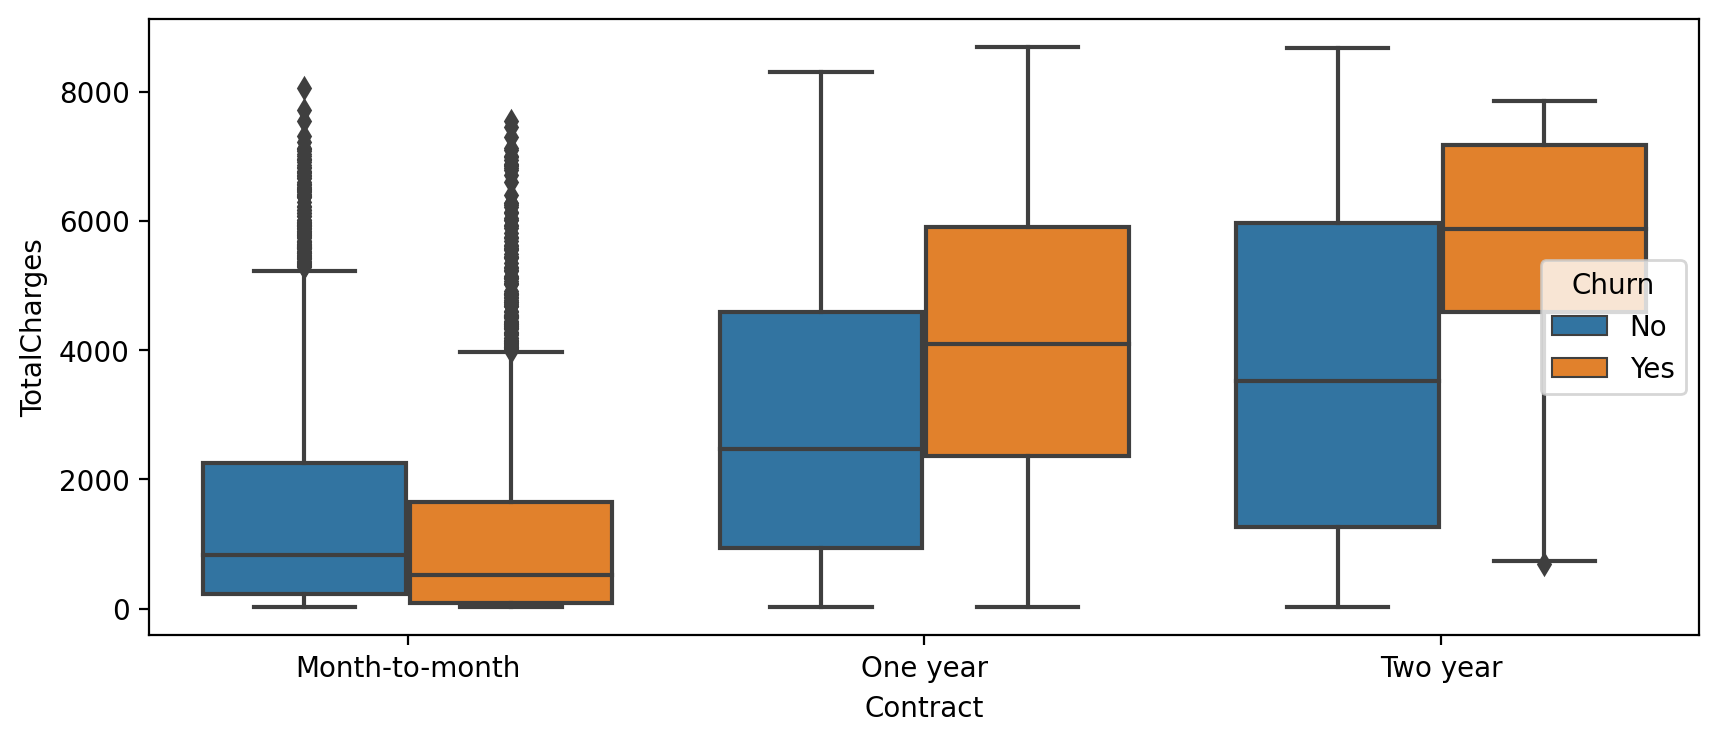

In [10]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')

In [11]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [12]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

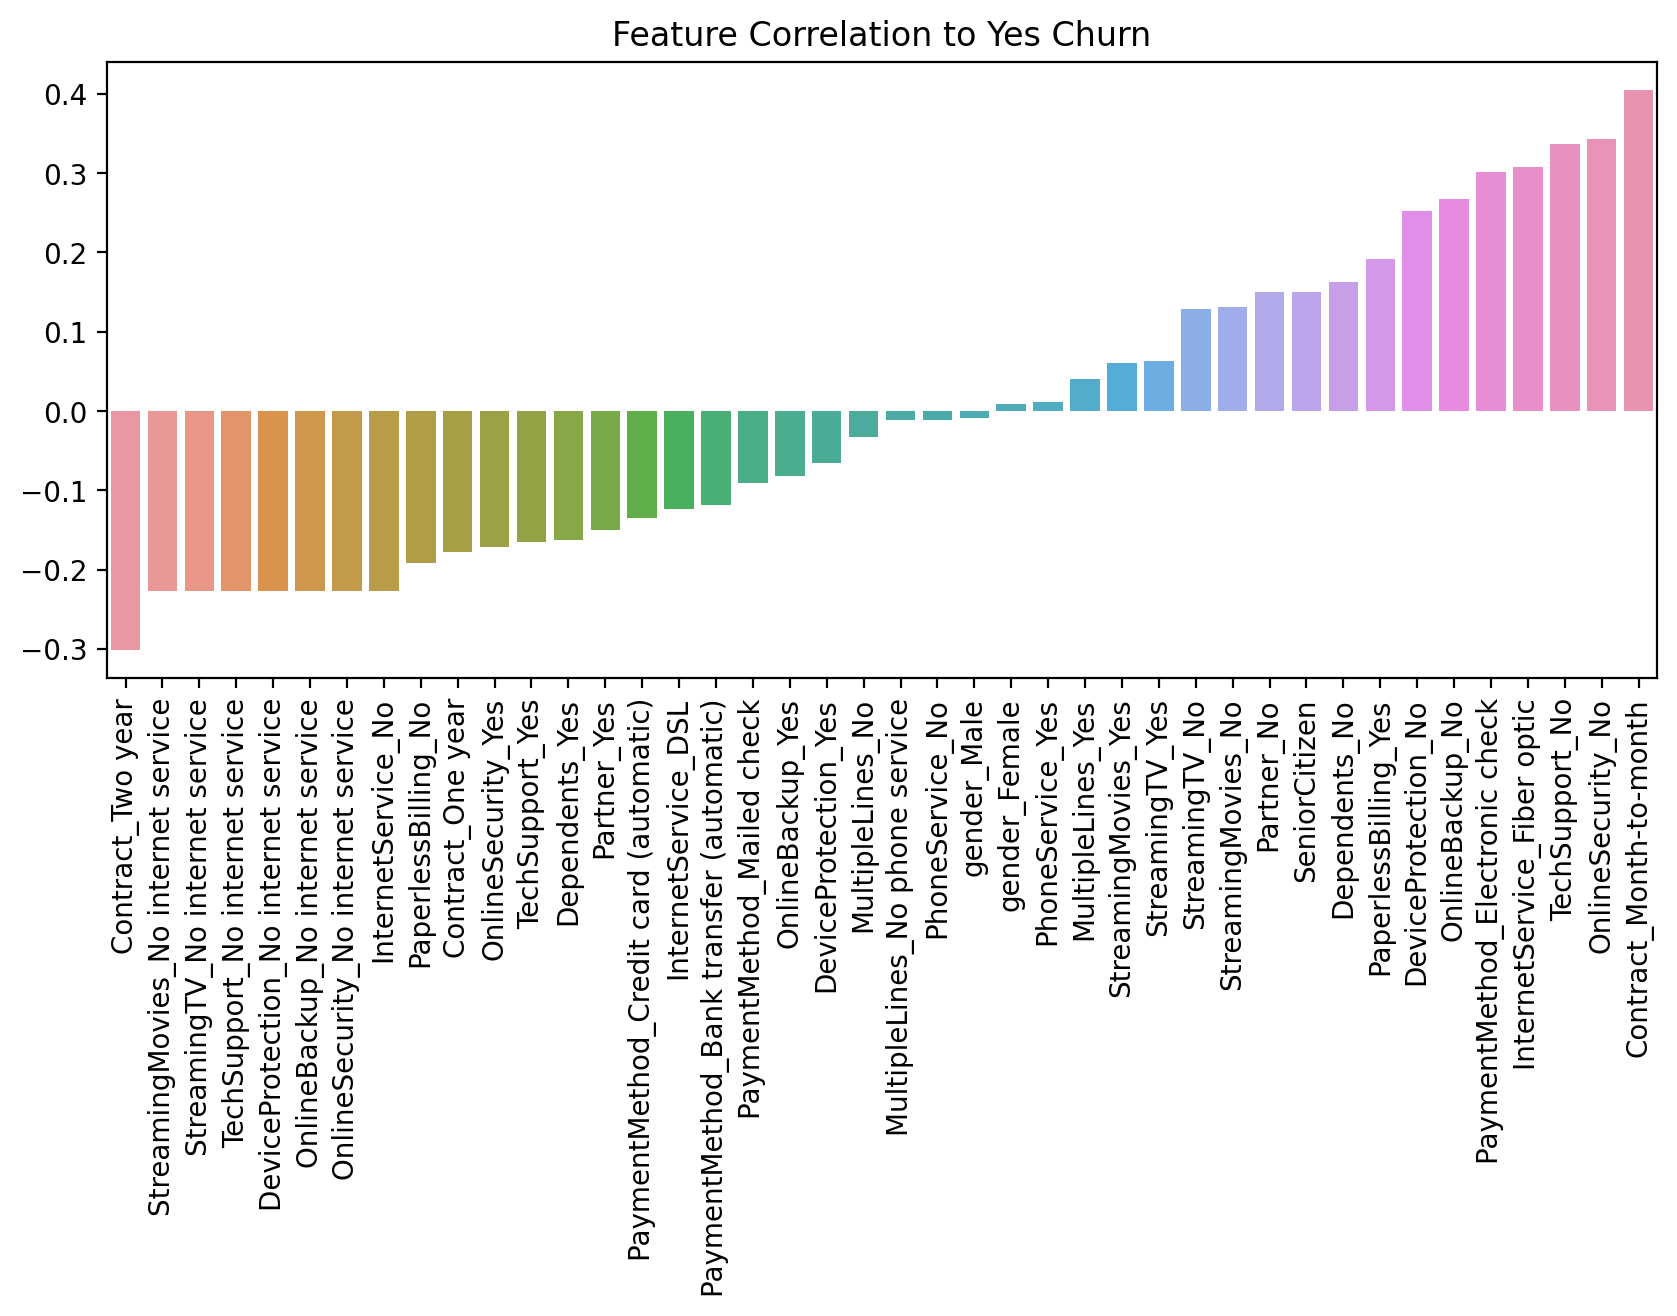

In [13]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

# Churn analysis

### This section focusses on creating cohort or segmentation based on tenure , creating cohorts allowing to study various cohortss .

In [14]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

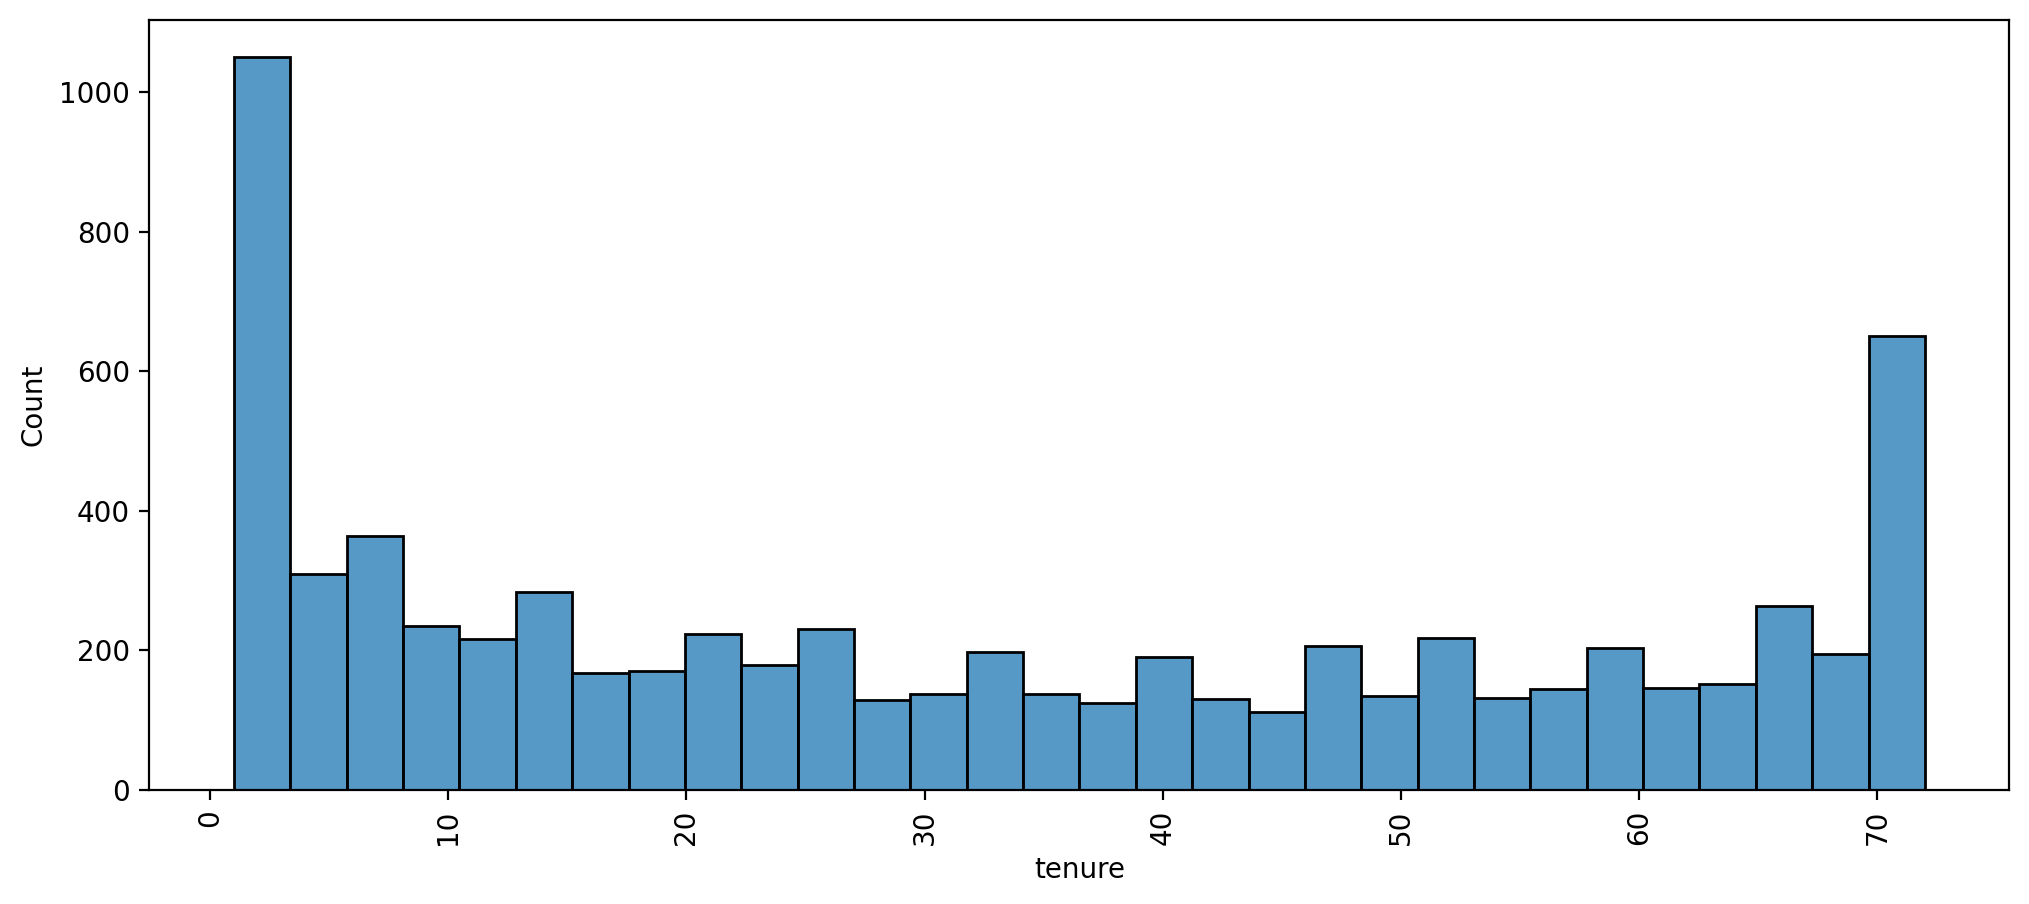

In [16]:
plt.figure(figsize=(12,5),dpi=200)
sns.histplot(x='tenure',data=df,bins=30)
plt.xticks(rotation=90);

### The above plot displays how long a person has been a customer for the firm

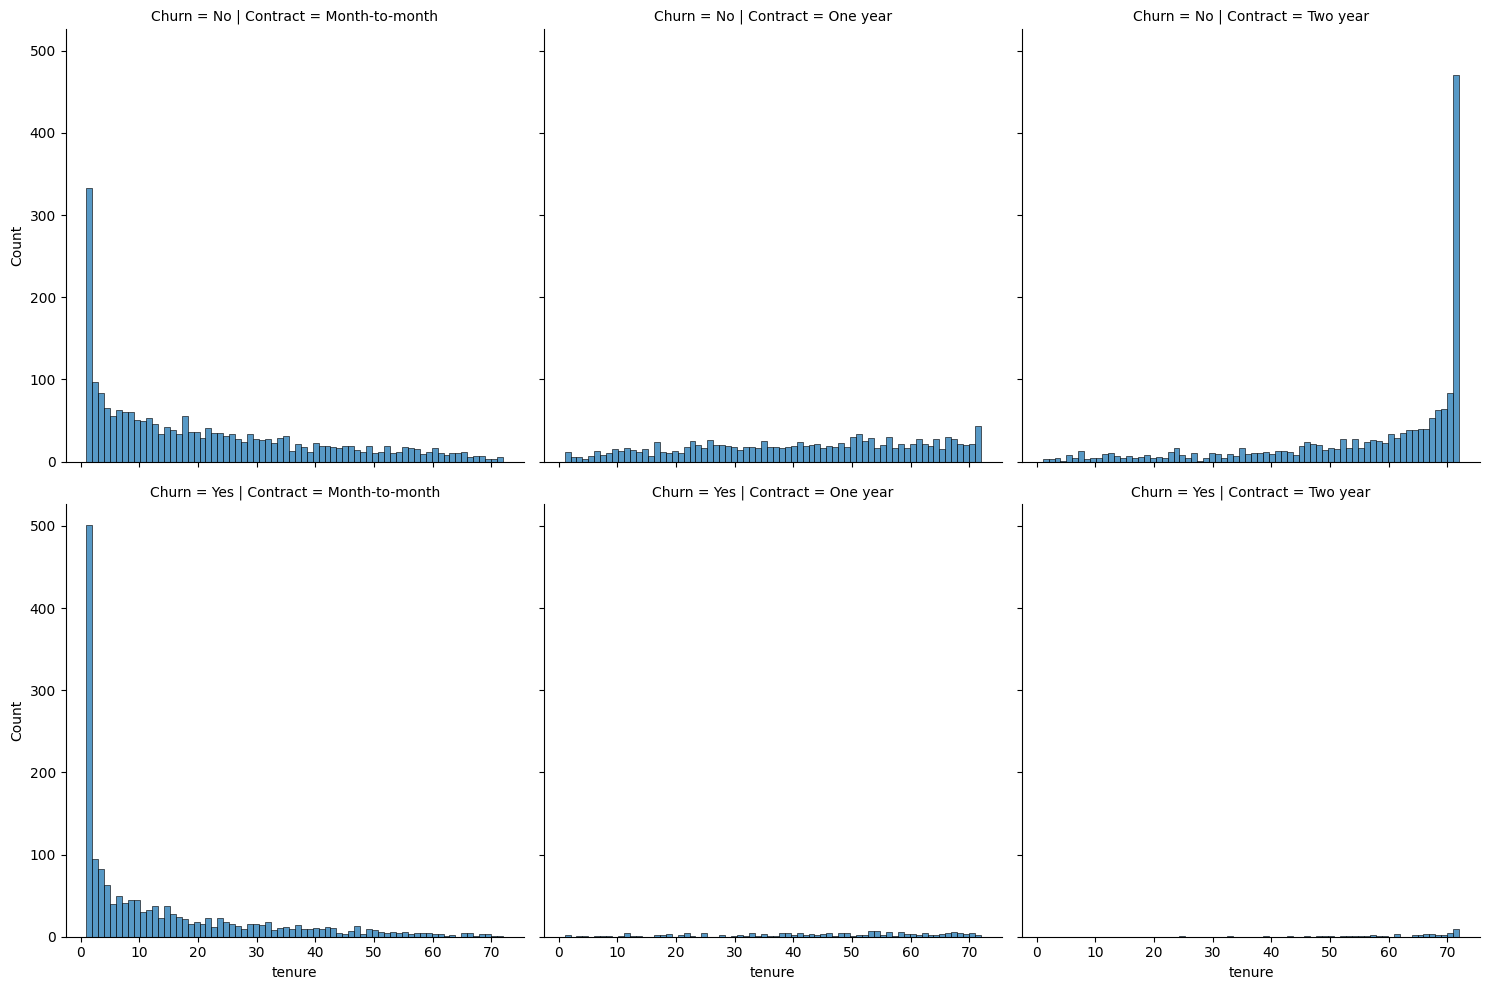

In [17]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

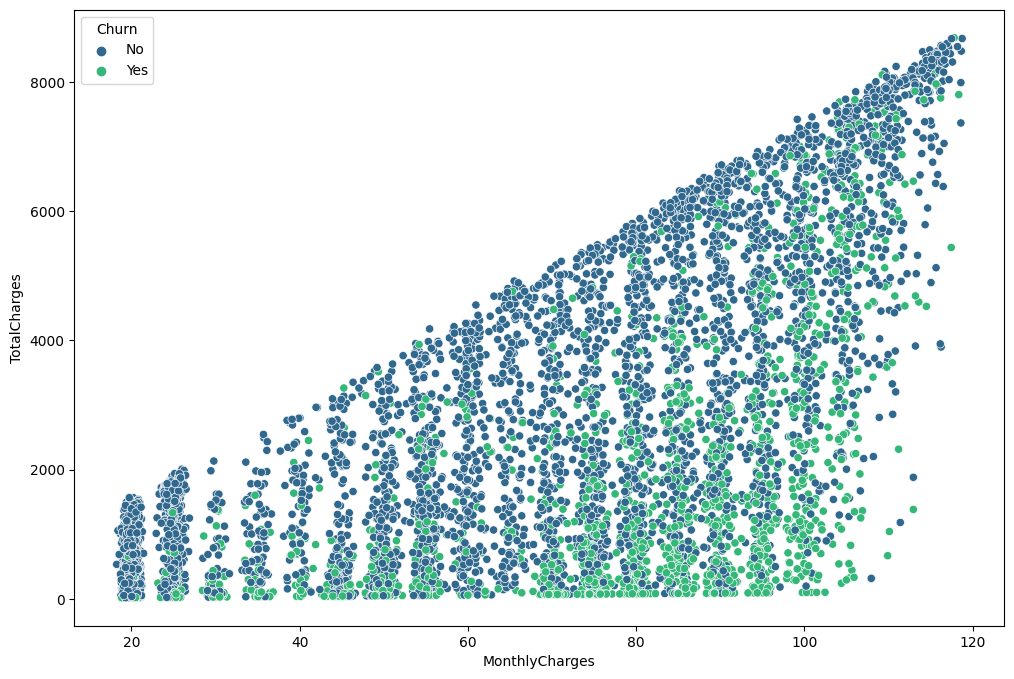

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn',palette="viridis")

### Let's start making cohort on the basis of tenure , treating every unique tenure such as 1 month,2 month ,3 month .....n months as it's own cohorts.
### Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. we should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it

In [19]:
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [20]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [21]:
churn_rate=100*yes_churn/(no_churn+yes_churn)
churn_rate.transpose()['gender']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: gender, Length: 72, dtype: float64

### Above list shows churn rate for various months.

<AxesSubplot:xlabel='tenure'>

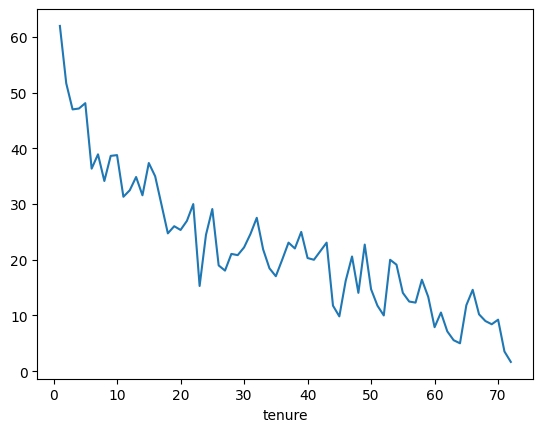

In [22]:
churn_rate.transpose()['gender'].plot()

## Broader Cohort Groups
### Based on the tenure column values , create a new column called Tenure Cohort that creates 4 seperate categories:
### 0-12 months,12-24 months,24-48 months,over 48 months

In [23]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure <25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else :
        return "Over 48 Months"

In [24]:
df['Tenure Cohort']=df['tenure'].apply(cohort)

In [25]:
df[['Tenure Cohort','tenure']]

,Tenure Cohort,tenure
0,0-12 Months,1
1,24-48 Months,34
2,0-12 Months,2
3,24-48 Months,45
4,0-12 Months,2
...,...,...
7027,12-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

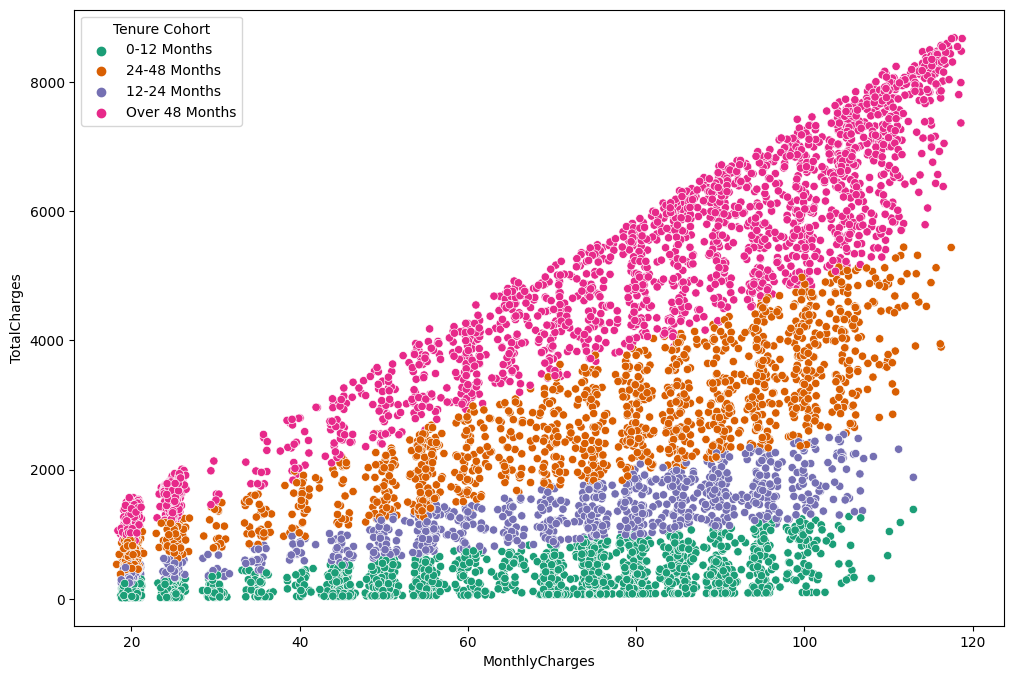

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Tenure Cohort',palette="Dark2")

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

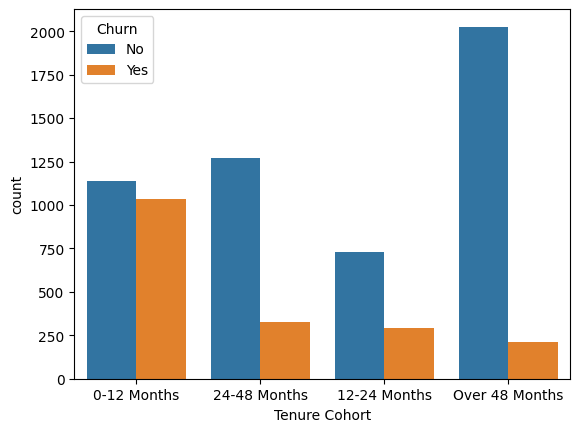

In [27]:
sns.countplot(x='Tenure Cohort',data=df,hue='Churn')

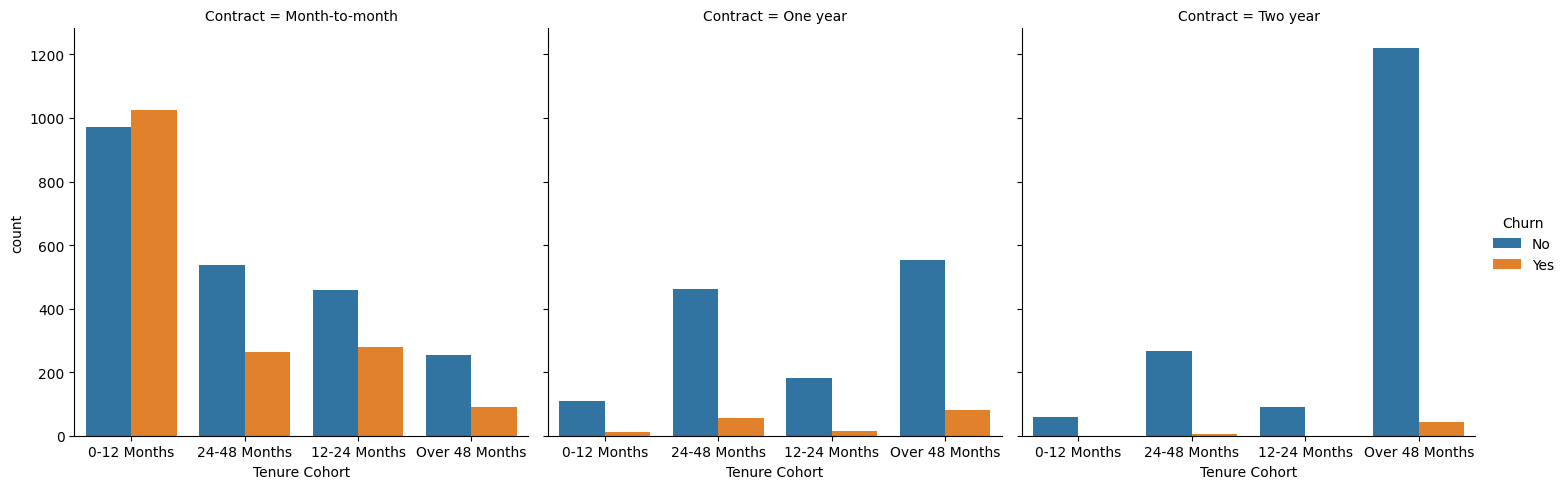

In [28]:
sns.catplot(data=df,x='Tenure Cohort',col='Contract',hue='Churn',kind='count')

## Predictive Modeling

### We will be using 4 model predicting techniques for the task - AdaBoost,Gradient Boosting, Random Forests and Decision Tree
## Single Decision Tree

In [29]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [30]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure Cohort_12-24 Months,Tenure Cohort_24-48 Months,Tenure Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,0,1,0,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [31]:
y=df['Churn']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=101)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
#help(DecisionTreeClassifier)

In [36]:
tree_model=DecisionTreeClassifier(max_depth=6)

In [37]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [38]:
preds=tree_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [40]:
accuracy_score(preds,y_test)

0.8096590909090909

In [41]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



c:\Users\ARYA SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


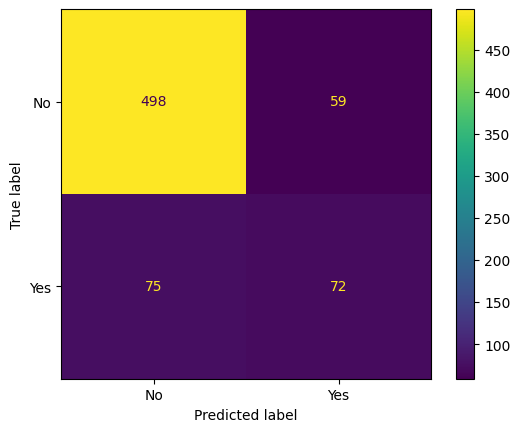

In [42]:
(plot_confusion_matrix(tree_model,X_test,y_test))

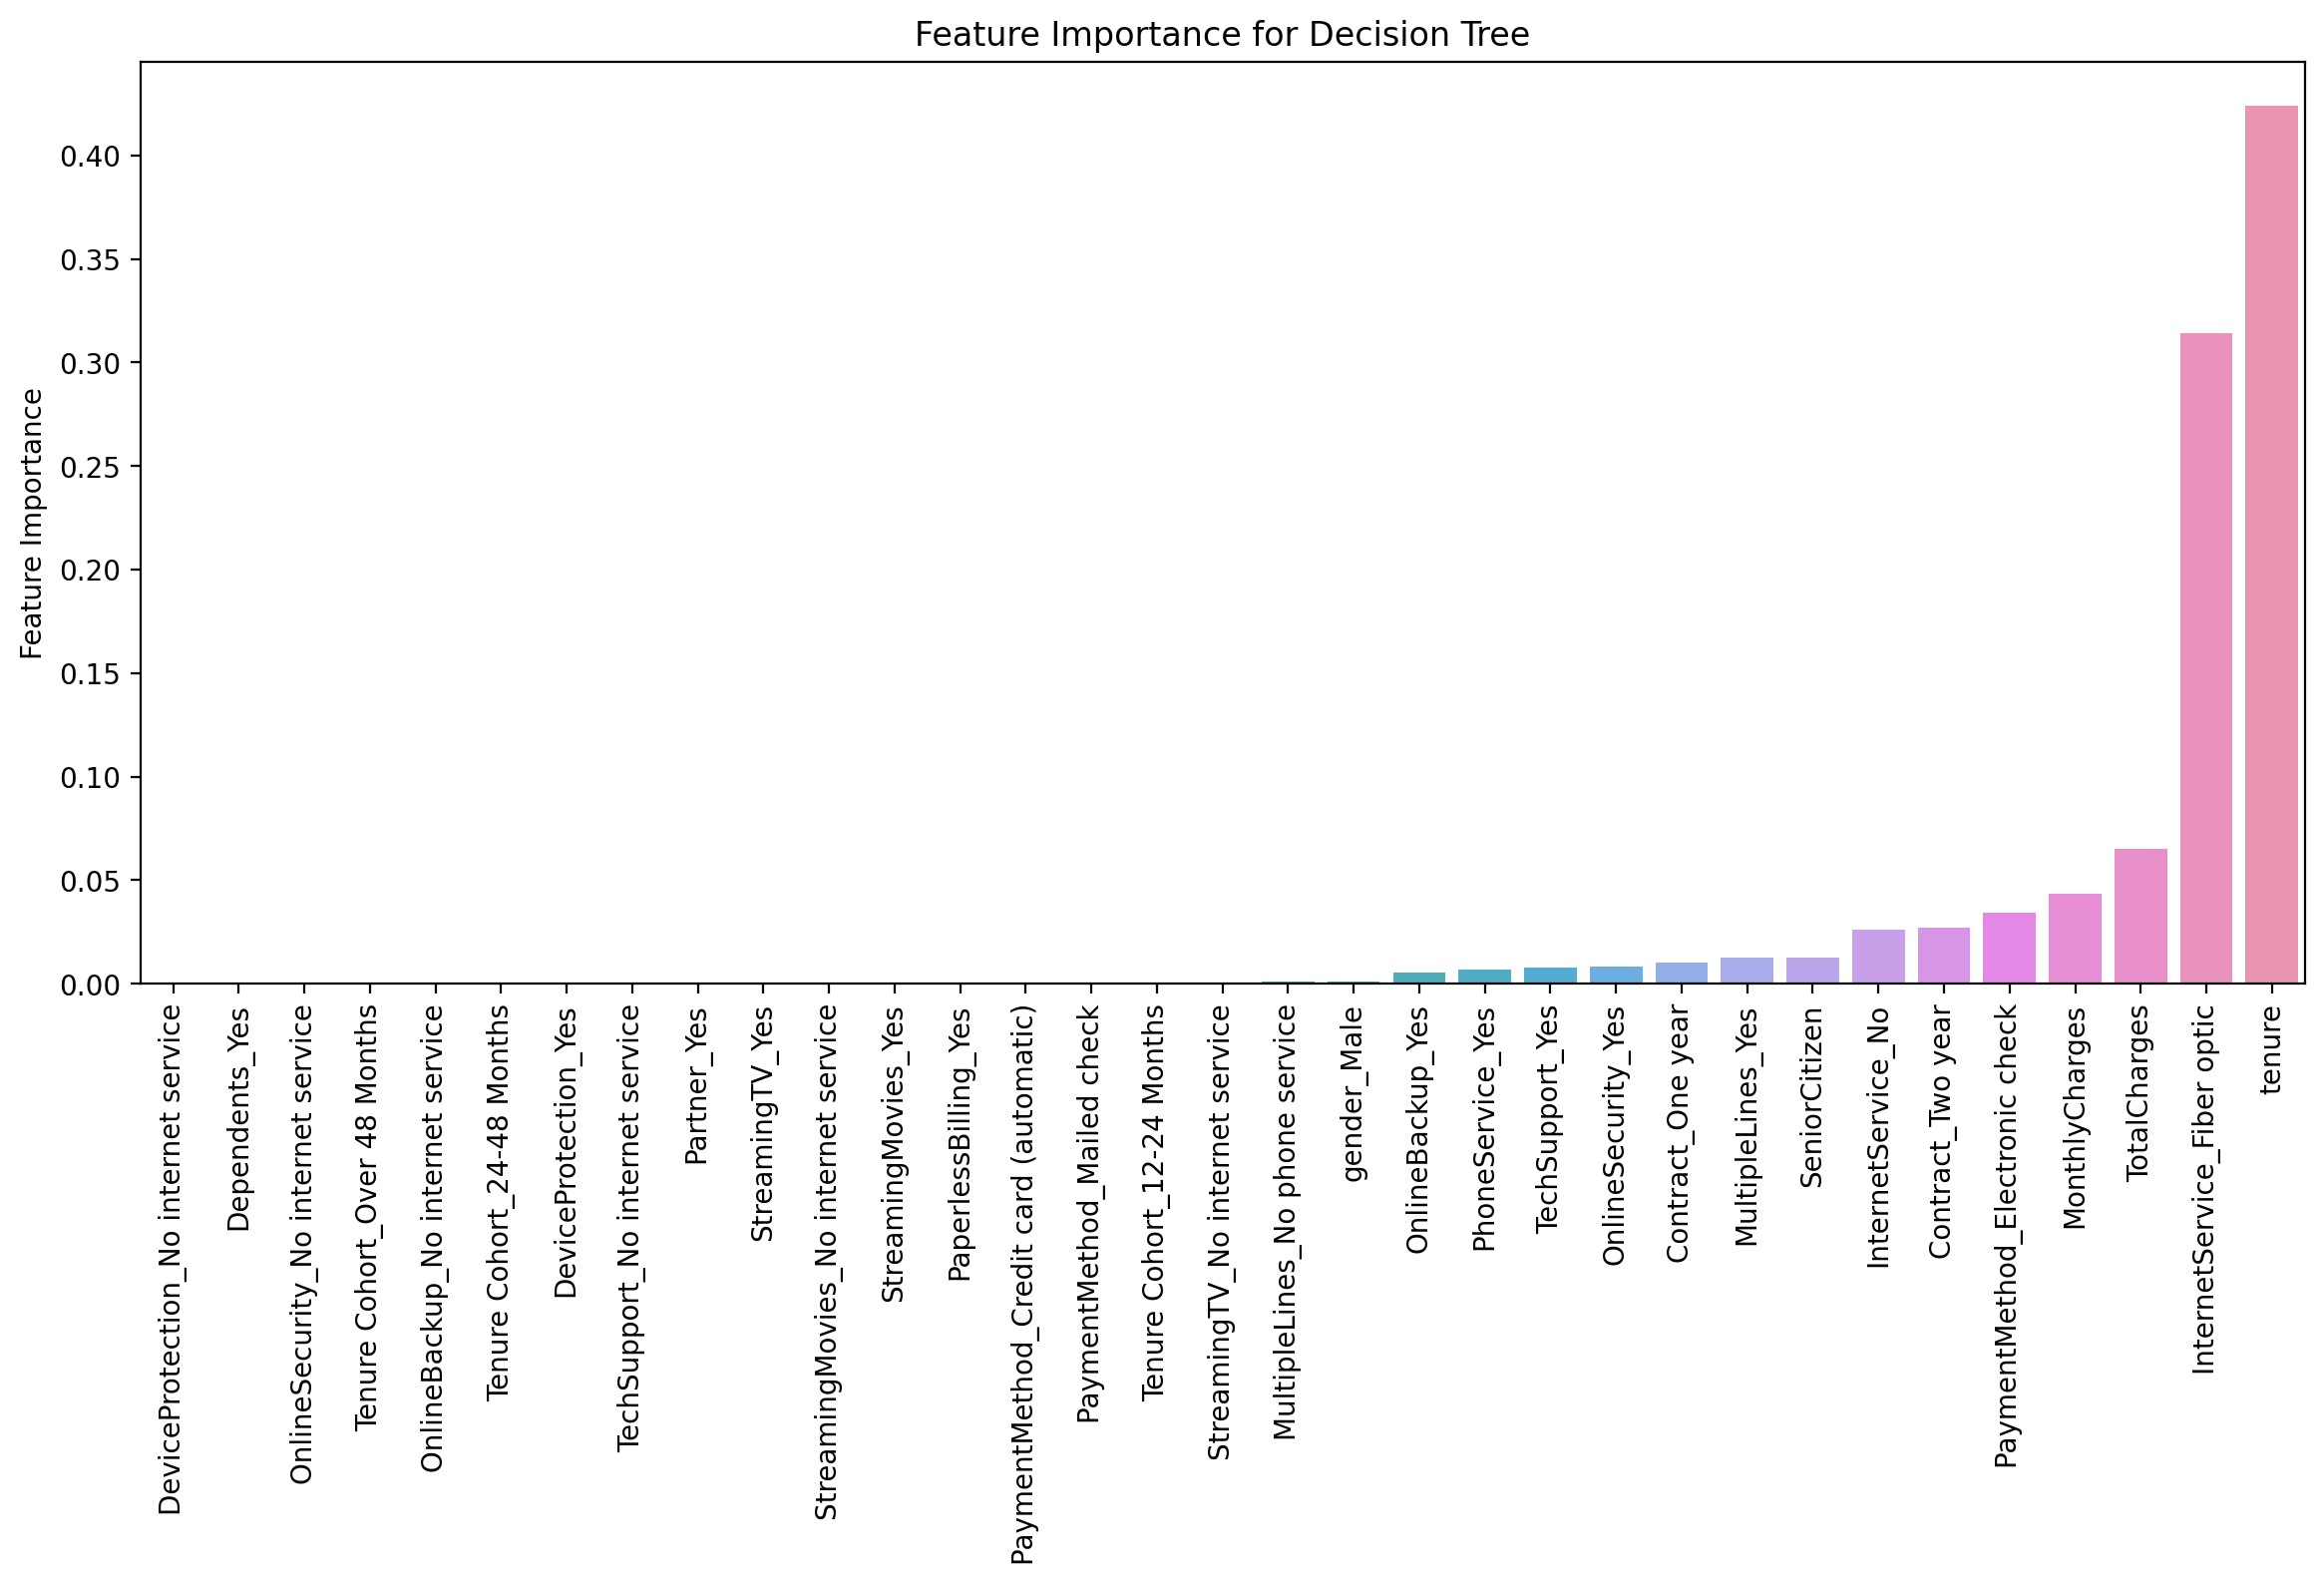

In [43]:
imp_feats = pd.DataFrame(data=tree_model.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [44]:
from sklearn.tree import plot_tree

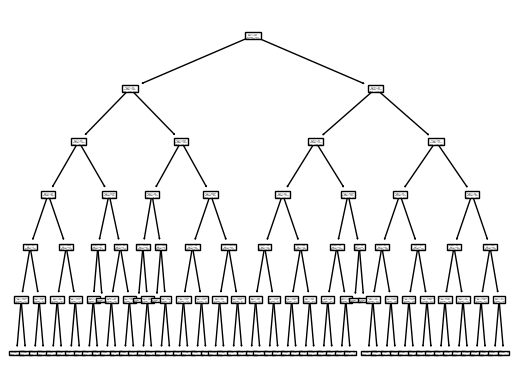

In [45]:
plot_tree(tree_model);

# Random Forests

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier(max_depth=7)

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7)

In [49]:
preds=rf.predict(X_test)

In [50]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89       557
         Yes       0.61      0.47      0.53       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.71       704
weighted avg       0.81      0.83      0.82       704



c:\Users\ARYA SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


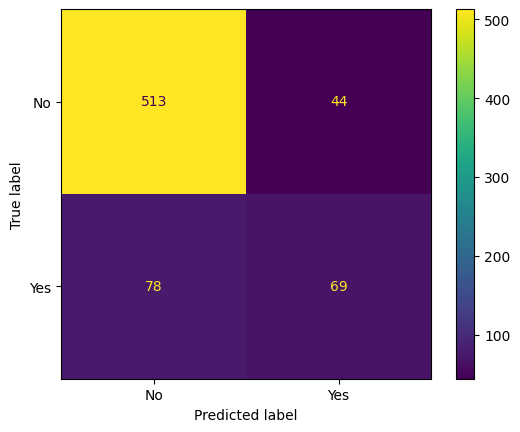

In [51]:
plot_confusion_matrix(rf,X_test,y_test);

# Boosted Trees

In [52]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [53]:
ada_model=AdaBoostClassifier(n_estimators=100)

In [54]:
gb_model=GradientBoostingClassifier()

In [55]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [56]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [57]:
ada_preds=ada_model.predict(X_test)
gb_preds=gb_model.predict(X_test)

In [58]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.92      0.90       557
         Yes       0.63      0.53      0.58       147

    accuracy                           0.84       704
   macro avg       0.76      0.72      0.74       704
weighted avg       0.83      0.84      0.83       704



In [59]:
print(classification_report(y_test,gb_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



c:\Users\ARYA SHARMA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


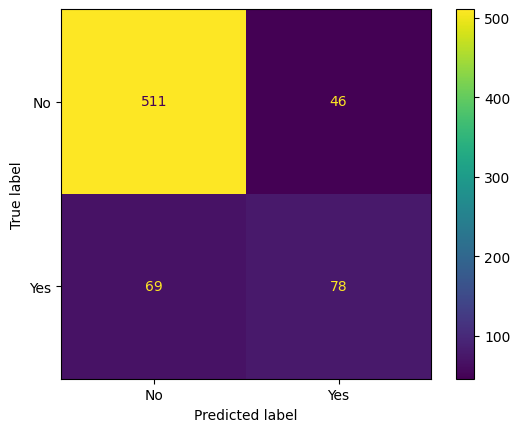

In [60]:
plot_confusion_matrix(ada_model,X_test,y_test)

## So we observe adaboost model performs best for our case